In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def Leer_Datos(Ruta, delimi = '\t',head = 0):
    datos = pd.read_csv(Ruta, delimiter = delimi , header = head , dtype=np.float64)
    return datos.values

def Normalizar_Datos(larray):
    promedio= np.mean(larray,axis=0)
    desviacion = np.std(larray, axis=0)
    for i in range(0,larray.shape[0]):
        larray[i] = np.true_divide(larray[i] - promedio,desviacion)
    return larray

def Crear_Entrenamiento_Prueba(larray):
    train, test = np.split(larray,[int(0.7*len(larray))])
    return train , test


In [4]:
#casas

casas = Leer_Datos('DataSet/ex1data2(Home_1f).csv')
objeto_x = casas[:,0:-1]
objeto_y = casas[:,-1]
#print(objeto_y)
objeto_x = Normalizar_Datos(objeto_x)
objeto_y = Normalizar_Datos(objeto_y)
#print(objeto_y)
#print(objeto_x)
print("##########################################")

casas_train_x , casas_test_x = Crear_Entrenamiento_Prueba(objeto_x)

casas_train_y , casas_test_y = Crear_Entrenamiento_Prueba(objeto_y)

#print(casas_train_x)
print("################################")
#np.savetxt('Train/casas_train_x.csv',casas_train_x,delimiter='\t')
#np.savetxt('Train/casas_train_y.csv',casas_train_y,delimiter='\t')

#np.savetxt('Test/casas_test_x.csv',casas_test_x,delimiter='\t')
#np.savetxt('Test/casas_test_y.csv',casas_test_y,delimiter='\t')
#a = Leer_Datos('Train/casas_train_x.csv')
#a = pd.read_csv('Train/casas_train_x.csv')
#print(a)


#oceano
oceano = Leer_Datos('DataSet/oceano_simple.csv')
objeto_x = oceano[:,0:-1]
objeto_y = oceano[:,-1]

objeto_x = Normalizar_Datos(objeto_x)
objeto_y = Normalizar_Datos(objeto_y)

oceano_train_x , oceano_test_x = Crear_Entrenamiento_Prueba(objeto_x)

oceano_train_y , oceano_test_y = Crear_Entrenamiento_Prueba(objeto_y)

#np.savetxt('Train/oceano_train_x.csv',oceano_train_x,delimiter='\t')
#np.savetxt('Train/oceano_train_y.csv',oceano_train_y,delimiter='\t')

#np.savetxt('Test/oceano_test_x.csv',oceano_test_x,delimiter='\t')
#np.savetxt('Test/oceano_test_y.csv',oceano_test_y,delimiter='\t')


#petroleo

petroleo = Leer_Datos('DataSet/petrol_consumption.csv')
objeto_x = petroleo[:,0:-1]
objeto_y = petroleo[:,-1]
#print(objeto_y)
objeto_x = Normalizar_Datos(objeto_x)
objeto_y = Normalizar_Datos(objeto_y)

petroleo_train_x , petroleo_test_x = Crear_Entrenamiento_Prueba(objeto_x)

petroleo_train_y , petroleo_test_y = Crear_Entrenamiento_Prueba(objeto_y)

#np.savetxt('Train/petroleo_train_x.csv',petroleo_train_x,delimiter='\t')
#np.savetxt('Train/petroleo_train_y.csv',petroleo_train_y,delimiter='\t')

#np.savetxt('Test/petroleo_test_x.csv',petroleo_test_x,delimiter='\t')
#np.savetxt('Test/petroleo_test_y.csv',petroleo_test_y,delimiter='\t')


##########################################
################################


In [5]:

casas_train_x = np.insert(casas_train_x, 0, 1, axis=1) 
casas_test_x = np.insert(casas_test_x, 0, 1, axis=1)


#print(oceano_train_x)
oceano_train_x = np.insert(oceano_train_x, 0, 1, axis=1)
oceano_test_x = np.insert(oceano_test_x, 0, 1, axis=1)


petroleo_train_x = np.insert(petroleo_train_x, 0, 1, axis =1)
petroleo_test_x = np.insert(petroleo_test_x, 0, 1, axis =1)


casas_train_y =  casas_train_y.reshape(len(casas_train_y),1)
casas_test_y = casas_test_y.reshape(len(casas_test_y),1)

oceano_train_y = oceano_train_y.reshape(len(oceano_train_y),1)
oceano_test_y = oceano_test_y.reshape(len(oceano_test_y),1)

petroleo_train_y = petroleo_train_y.reshape(len(petroleo_train_y),1)
petroleo_test_y = petroleo_test_y.reshape(len(petroleo_test_y),1)

print(casas_test_y)

[[-0.20624201]
 [ 1.93599378]
 [-0.44067536]
 [-0.73169607]
 [-0.89337424]
 [ 0.03708364]
 [ 1.686201  ]
 [-0.43178306]
 [ 0.22705549]
 [-0.08498338]
 [-0.21351753]
 [-0.33477616]
 [-1.29756968]
 [-0.32750064]
 [-0.81576872]]


In [7]:
casas_theta = np.zeros(casas_train_x.shape[1])[np.newaxis]
oceano_theta = np.zeros(oceano_train_x.shape[1])[np.newaxis]
petroleo_theta = np.zeros(petroleo_train_x.shape[1])[np.newaxis]

print(casas_theta)
print(oceano_theta)
print(petroleo_theta)


[[0. 0.]]
[[0. 0.]]
[[0. 0. 0. 0. 0.]]


In [8]:
#Funciones segismundianas
#print(len(casas_test_x))  #filas
def Calcular_Costo(X, Y, theta):
    tam = len(X)
    cost = np.sum((np.dot(X,theta.T)-Y)**2) / (2*tam)
    return cost

def Gradiente_descendiente(X, Y, theta, itera, tasa):
    costs = [0]*itera
    tam = len(X)
    for i in range(itera):
        hipotesis = np.dot(X,theta.T)
        rest = hipotesis - Y
        derivada = np.dot(X.T,rest) / tam
        theta = theta - (tasa * derivada).T
        costs[i] = Calcular_Costo(X, Y , theta)
    return theta, costs

def Ecuacion_Normal(X, Y):
    theta = np.linalg.inv(np.dot(X.T,X))
    theta = np.dot(theta,X.T)
    theta = np.dot(theta, Y)
    return theta.T

def MSE(Yp,Y):
    tam =len(Y)
    error = np.sum((Yp - Y)**2) / tam
    return error
        
        


In [9]:
#experimento 1

theta_casa_entre = Ecuacion_Normal(casas_train_x,casas_train_y)
print(theta_casa_entre)
error_casa_train = MSE(np.dot(casas_train_x,theta_casa_entre.T),casas_train_y)
error_casa = MSE(np.dot(casas_test_x,theta_casa_entre.T),casas_test_y)

theta_oceano_entre = Ecuacion_Normal(oceano_train_x, oceano_train_y)
error_oceano_train = MSE(np.dot(oceano_train_x, theta_oceano_entre.T), oceano_train_y)
error_oceano = MSE(np.dot(oceano_test_x, theta_oceano_entre.T), oceano_test_y)

theta_petroleo_entre = Ecuacion_Normal(petroleo_train_x, petroleo_train_y)
error_petroleo_train = MSE(np.dot(petroleo_train_x, theta_petroleo_entre.T), petroleo_train_y)
error_petroleo = MSE(np.dot(petroleo_test_x, theta_petroleo_entre.T), petroleo_test_y)


df = pd.DataFrame({'casassssssssssssss':[error_casa_train, error_casa],'oceanosssssss':[error_oceano_train, error_oceano],'petroleossssssss':[error_petroleo_train, error_petroleo]}, index = ['entrenamiento', 'prueba'])
print(df)




[[0.04941133 0.93421781]]
               casassssssssssssss  oceanosssssss  petroleossssssss
entrenamiento            0.292740       0.169704          0.211136
prueba                   0.245661       0.114843          0.711440


In [10]:
#experimento #2
Tasa_aprendizaje =[0.01, 0.05, 0.1, 0.2, 0.3, 0.4 ]
Iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]

Matrix_MSE = np.zeros((len(Tasa_aprendizaje),len(Iteraciones)))
#print(Matrix_MSE)

### Casas
valoresCasas =(0,0)
for i in range(len(Tasa_aprendizaje)):
    for j in range(len(Iteraciones)):
        theta_actual, _ = Gradiente_descendiente(casas_train_x, casas_train_y, casas_theta, Iteraciones[j],Tasa_aprendizaje[i])  
        Matrix_MSE[i,j] = MSE(casas_test_x.dot(theta_actual.T), casas_test_y)#np.dot(casas_t,theta.T)
        if(Matrix_MSE[i,j] < Matrix_MSE[valoresCasas[0],valoresCasas[1]]):
            valoresCasas = (i,j)

            
            
print("valor minimo con caasas:",Tasa_aprendizaje[valoresCasas[0]],Iteraciones[valoresCasas[1]])
df_casas = pd.DataFrame(data=Matrix_MSE, index = Tasa_aprendizaje, columns=  Iteraciones)
print(df_casas)
            
## Oceanos            
valoresOceanos =(0,0)
for i in range(len(Tasa_aprendizaje)):
    for j in range(len(Iteraciones)):
        theta_actual, vac = Gradiente_descendiente(oceano_train_x, oceano_train_y, oceano_theta, Iteraciones[j],Tasa_aprendizaje[i])
        Matrix_MSE [i,j] = MSE(oceano_test_x.dot(theta_actual.T), oceano_test_y)
        if(Matrix_MSE[i,j]< Matrix_MSE[valoresOceanos[0],valoresOceanos[1]]):
            valoresOceanos = (i,j)

            

df_oceano = pd.DataFrame(data=Matrix_MSE, index = Tasa_aprendizaje, columns=  Iteraciones)

print(df_oceano)


## Petroleo  
valoresPetroleo=(0,0)
for i in range(len(Tasa_aprendizaje)):
    for j in range(len(Iteraciones)):
        theta_actual, vac = Gradiente_descendiente(petroleo_train_x, petroleo_train_y, petroleo_theta, Iteraciones[j],Tasa_aprendizaje[i])
        Matrix_MSE [i,j] = MSE(petroleo_test_x.dot(theta_actual.T), petroleo_test_y)
        if(Matrix_MSE[i,j]< Matrix_MSE[valoresPetroleo[0],valoresPetroleo[1]]):
            valores = (i,j)

            

df_petroleo = pd.DataFrame(data=Matrix_MSE, index = Tasa_aprendizaje, columns=  Iteraciones)

print(df_petroleo)


print("valor minimo con casas:",Tasa_aprendizaje[valoresCasas[0]],Iteraciones[valoresCasas[1]])
print("valor minimo con oceanos:",Tasa_aprendizaje[valoresOceanos[0]],Iteraciones[valoresOceanos[1]])
print("valor minimo con petroleo:",Tasa_aprendizaje[valoresPetroleo[0]],Iteraciones[valoresPetroleo[1]])



valor minimo con caasas: 0.01 500
          500       1000      1500      2000      2500      3000      3500
0.01  0.241804  0.245629  0.245661  0.245661  0.245661  0.245661  0.245661
0.05  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.10  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.20  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.30  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.40  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
          500       1000      1500      2000      2500      3000      3500
0.01  0.115236  0.114845  0.114844  0.114843  0.114843  0.114843  0.114843
0.05  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.10  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.20  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.30  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  

[[0.04945348 0.9262821 ]]
Gradiente Descendiente
[[0.04945348 0.9262821 ]]
Ecuacion normal
[[0.04941133 0.93421781]]


Text(0, 0.5, 'Precio')

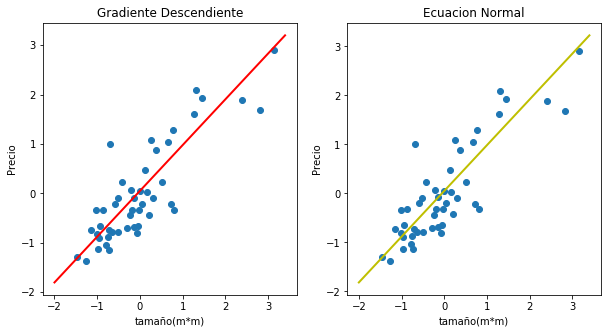

In [11]:
#experimento 3
fig, ax = plt.subplots(1,2,figsize=(10,5))

puntos = np.concatenate((casas_train_x,casas_test_x))[:,1]  # se elimina los 1's de los x

Theta_gradiente,_ = Gradiente_descendiente(casas_train_x, casas_train_y, casas_theta,Iteraciones[0],Tasa_aprendizaje[0])
print(Theta_gradiente)
Theta_normal = Ecuacion_Normal(casas_train_x, casas_train_y)

recta_x = np.arange(-2,3.5,0.1)[np.newaxis].T
#print(recta_x)
recta_x = np.insert(recta_x,0,1,axis=1)
#print(recta_x)
gradiente_y = np.dot(recta_x,Theta_gradiente.T)
normal_y = np.dot(recta_x, Theta_normal.T)

print("Gradiente Descendiente")
print(Theta_gradiente)
print("Ecuacion normal")
print(Theta_normal)

ax[0].scatter(puntos,np.concatenate((casas_train_y,casas_test_y)))
ax[0].plot(recta_x[:,1],gradiente_y,'-r',linewidth=2.0)
ax[0].set_title("Gradiente Descendiente")
ax[0].set_xlabel("tamaño(m*m)")
ax[0].set_ylabel("Precio")


ax[1].scatter(puntos,np.concatenate((casas_train_y,casas_test_y)))
ax[1].plot(recta_x[:,1],normal_y,'-y',linewidth=2.0)
ax[1].set_title("Ecuacion Normal")
ax[1].set_xlabel("tamaño(m*m)")
ax[1].set_ylabel("Precio")



Text(0, 0.5, 'Costos')

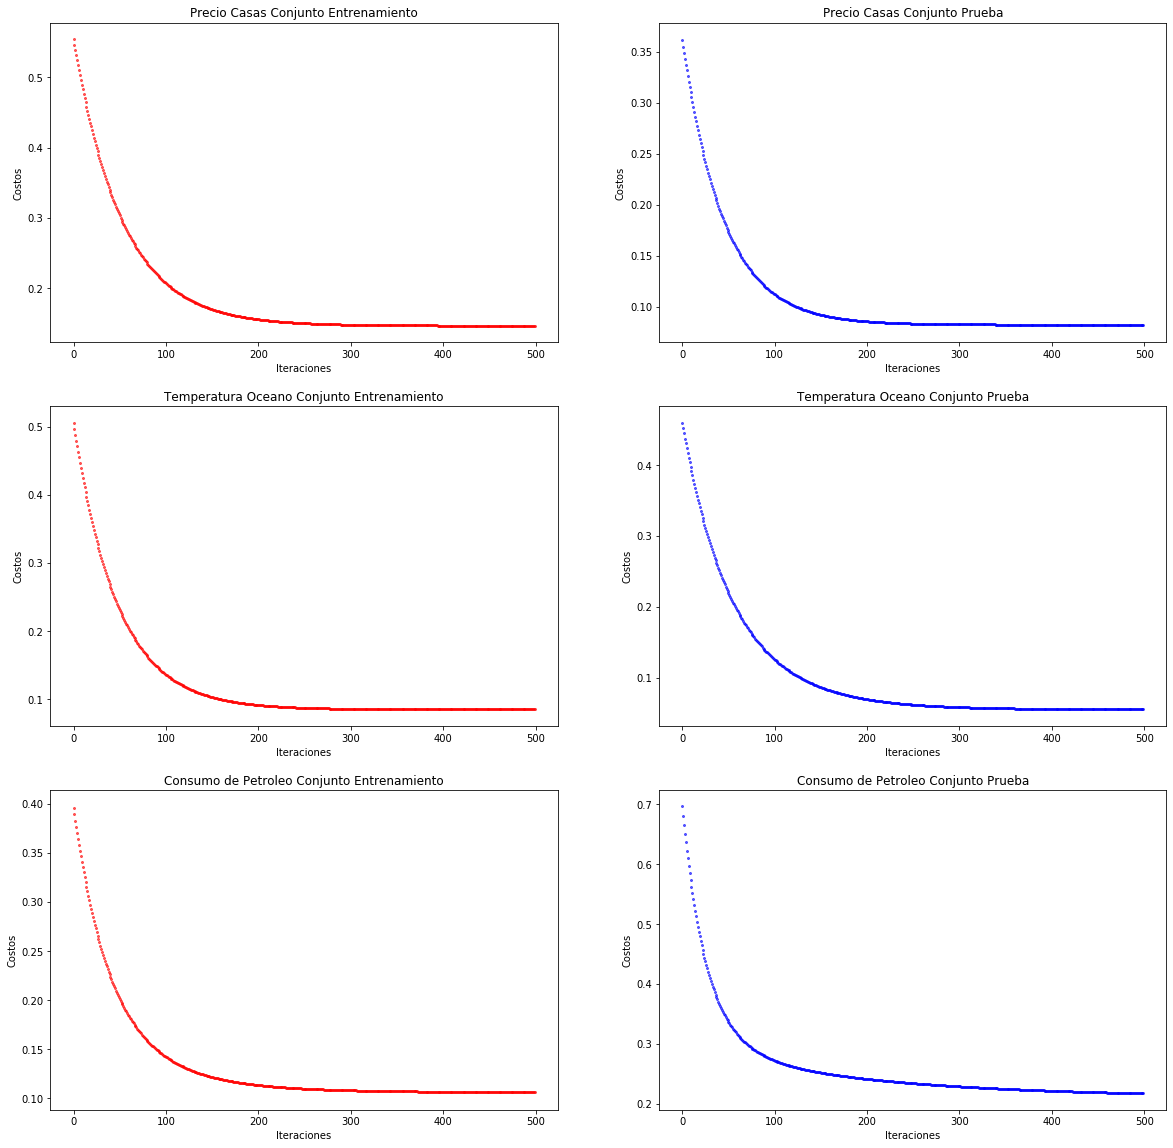

In [22]:
#experimento 4
fig, ax = plt.subplots(3,2, figsize=(20,20))

Casas_train_theta_g, casas_costos_tr = Gradiente_descendiente(casas_train_x,casas_train_y,casas_theta,Iteraciones[0],Tasa_aprendizaje[0])
Casas_test_theta_g, casas_costos_tes = Gradiente_descendiente(casas_test_x,casas_test_y,casas_theta,Iteraciones[0],Tasa_aprendizaje[0])

ax[0][0].scatter(np.arange(Iteraciones[0]),casas_costos_tr,alpha = 0.6, c="red",s=4)
ax[0][0].set_title("Precio Casas Conjunto Entrenamiento")
ax[0][0].set_xlabel('Iteraciones')
ax[0][0].set_ylabel('Costos')




ax[0][1].scatter(np.arange(Iteraciones[0]),casas_costos_tes,alpha = 0.6, c="blue",s=4)
ax[0][1].set_title("Precio Casas Conjunto Prueba")
ax[0][1].set_xlabel('Iteraciones')
ax[0][1].set_ylabel('Costos')


Oceano_train_theta_g, oceano_costos_tr = Gradiente_descendiente(oceano_train_x,oceano_train_y,oceano_theta,Iteraciones[0],Tasa_aprendizaje[0])
Oceano_test_theta_g, oceano_costos_tes = Gradiente_descendiente(oceano_test_x,oceano_test_y,oceano_theta,Iteraciones[0],Tasa_aprendizaje[0])

ax[1][0].scatter(np.arange(Iteraciones[0]),oceano_costos_tr,alpha = 0.6, c="red",s=4)
ax[1][0].set_title("Temperatura Oceano Conjunto Entrenamiento")
ax[1][0].set_xlabel('Iteraciones')
ax[1][0].set_ylabel('Costos')

ax[1][1].scatter(np.arange(Iteraciones[0]),oceano_costos_tes,alpha = 0.6, c="blue",s=4)
ax[1][1].set_title("Temperatura Oceano Conjunto Prueba")
ax[1][1].set_xlabel('Iteraciones')
ax[1][1].set_ylabel('Costos')

Petroleo_train_theta_g, petroleo_costos_tr = Gradiente_descendiente(petroleo_train_x,petroleo_train_y,petroleo_theta,Iteraciones[0],Tasa_aprendizaje[0])
Petroleo_test_theta_g, petroleo_costos_tes = Gradiente_descendiente(petroleo_test_x,petroleo_test_y,petroleo_theta,Iteraciones[0],Tasa_aprendizaje[0])

ax[2][0].scatter(np.arange(Iteraciones[0]),petroleo_costos_tr,alpha = 0.6, c="red",s=4)
ax[2][0].set_title("Consumo de Petroleo Conjunto Entrenamiento")
ax[2][0].set_xlabel('Iteraciones')
ax[2][0].set_ylabel('Costos')

ax[2][1].scatter(np.arange(Iteraciones[0]),petroleo_costos_tes,alpha = 0.6, c="blue",s=4)
ax[2][1].set_title("Consumo de Petroleo Conjunto Prueba")
ax[2][1].set_xlabel('Iteraciones')
ax[2][1].set_ylabel('Costos')

